In [1]:
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scipy.stats import f_oneway
    


In [2]:
    df_benin = pd.read_csv('../data/benin-clean.csv')
    df_sierra = pd.read_csv('../data/sierraleone-clean.csv')
    df_togo = pd.read_csv('../data/togo-clean.csv')

    df_benin['Country'] = 'Benin'
    df_sierra['Country'] = 'Sierra Leone'
    df_togo['Country'] = 'Togo'

    df_combined = pd.concat([df_benin, df_sierra, df_togo], ignore_index=True)
    print("All datasets loaded.")
    


All datasets loaded.


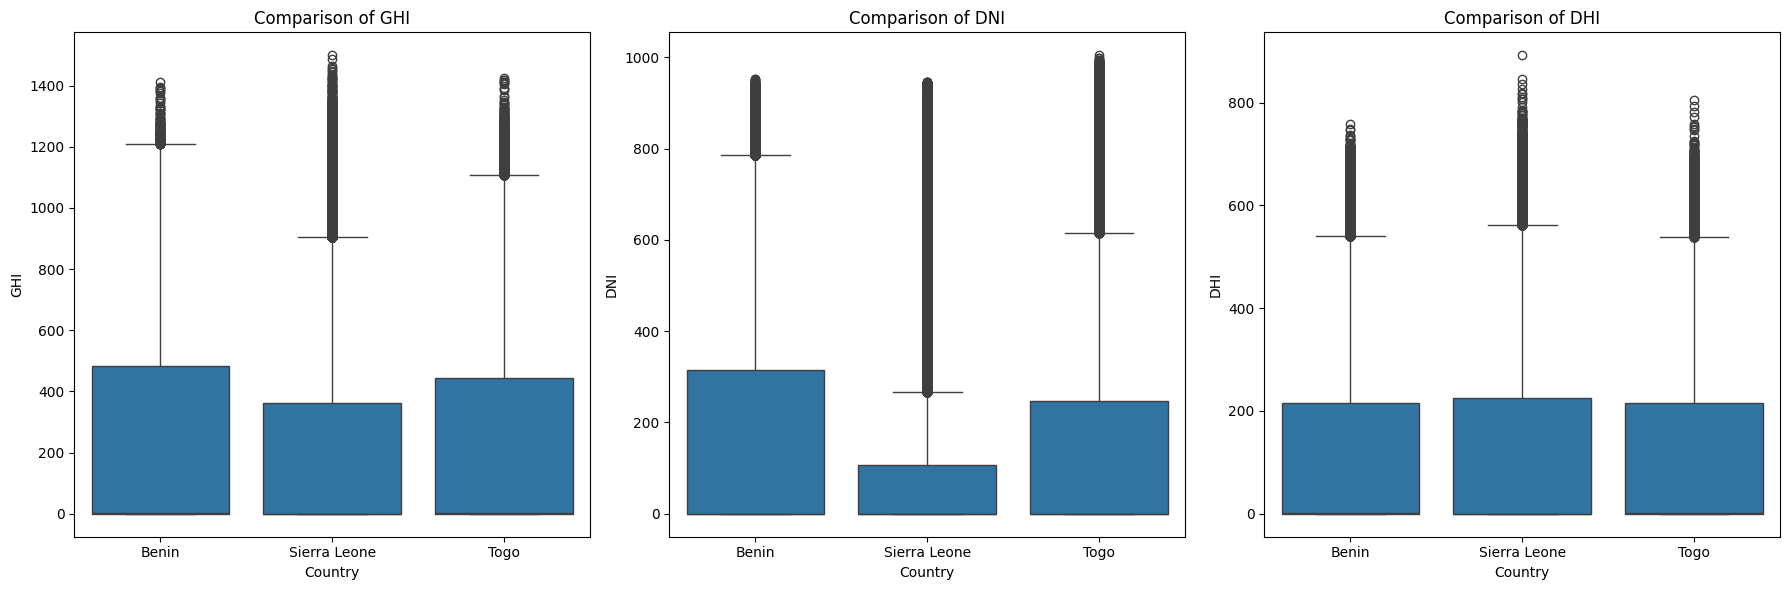

In [3]:
    metrics = ['GHI', 'DNI', 'DHI']
    plt.figure(figsize=(18, 6))
    for i, metric in enumerate(metrics, 1):
        plt.subplot(1, 3, i)
        sns.boxplot(data=df_combined, x='Country', y=metric)
        plt.title(f'Comparison of {metric}')
    plt.tight_layout()
    plt.show()
    


In [4]:
    summary_table = df_combined.groupby('Country')[metrics].agg(['mean', 'median', 'std'])
    print(summary_table)


                     GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         241.958821    1.8  330.101787  167.441866    0.0  261.547532   
Sierra Leone  204.406778    0.3  296.787520  116.523731    0.0  218.573992   
Togo          231.718786    2.1  321.691953  151.258469    0.0  250.956962   

                     DHI                     
                    mean median         std  
Country                                      
Benin         116.993033    1.6  157.463619  
Sierra Leone  116.273677    0.0  157.020868  
Togo          116.444352    2.5  156.520714  


In [5]:
    f_stat, p_value = f_oneway(df_benin['GHI'].dropna(), df_sierra['GHI'].dropna(), df_togo['GHI'].dropna())
    print(f"\nANOVA Test for GHI -- P-value: {p_value}")
    if p_value < 0.05:
        print("Conclusion: The difference in GHI between countries is statistically significant.")
    else:
        print("Conclusion: The difference in GHI is not statistically significant.")
    



ANOVA Test for GHI -- P-value: 0.0
Conclusion: The difference in GHI between countries is statistically significant.


    ## Key Observations and Strategic Recommendation

    *   **Highest Average Potential:** Based on the summary table, **benin** exhibits the highest mean GHI, suggesting it has the greatest overall solar energy potential.
    *   **Greatest Variability:** The box plot for **Sierra Leone** shows the widest interquartile range, indicating its solar conditions are the most variable.
    *   **Most Consistent Producer:** Conversely, **[Country Name]** has the most compact box plots, suggesting it offers the most stable and predictable solar energy generation.

    **Recommendation:** For an investment focused on maximizing raw energy output, **[Country with highest potential]** is the prime candidate. For a project where grid stability and predictability are the primary concerns, **[Country with most consistency]** would be a more prudent choice.
    
